In [2]:
from sklearn import datasets
import numpy as np

In [3]:
iris = datasets.load_iris()
x=iris.data[:,[2,3]]
y=iris.target

In [4]:
np.unique(y)
#return the class labels in the dataset, we have three so

array([0, 1, 2])

In [5]:
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [6]:
from sklearn.model_selection import train_test_split

In [7]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [8]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(x_train)
x_train_std=sc.transform(x_train)
x_test_std=sc.transform(x_test)

In [9]:
from sklearn.linear_model import Perceptron

ppn=Perceptron(max_iter=40,eta0=0.1,random_state=0)#eta0 is the learning rate, n_iter is num_epoch
ppn.fit(x_train_std,y_train)

Perceptron(eta0=0.1, max_iter=40)

In [13]:
y_pred = ppn.predict(x_test_std)

In [18]:
print('correct classified samples: %d' % (y_test == y_pred).sum())

correct classified samples: 40


In [20]:
from sklearn.metrics import accuracy_score
print('Accuracy: %.1f'% accuracy_score(y_test,y_pred))
#print the test accuracy

Accuracy: 0.9


Text(0, 0.5, '$\\phi(z)$')

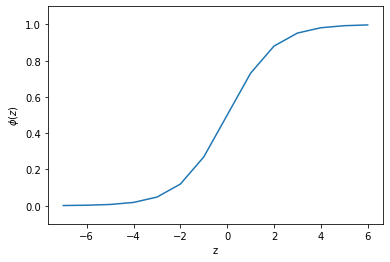

In [21]:
#sigmoid function presentation 
import matplotlib.pyplot as plt
import numpy as np

def sigmoid(z):
    return 1.0/(1+np.exp(-z))
z=np.arange(-7,7)

phi_z=sigmoid(z)
plt.plot(z,phi_z)
plt.ylim(-0.1,1.1)
plt.xlabel('z')
plt.ylabel('$\phi(z)$')

In [27]:
from sklearn.svm import SVC
svm=SVC(kernel='linear',C=1.0,random_state=0)

In [10]:
#important tool decision plots
from matplotlib.colors import ListedColormap

def plot_decision_regions(X,y,classifier,resolution=0.02):
    markers = ('s', 'x', 'o', '^', 'v')#set up the marker generator
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')#colormap
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1 #determine the min nad mx values of the two features
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution)) #create a pair of grid arrays
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap) 
    plt.xlim(xx1.min(), xx1.max()) 
    plt.ylim(xx2.min(), xx2.max())
    
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap(idx),
                    marker=markers[idx], label=cl)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


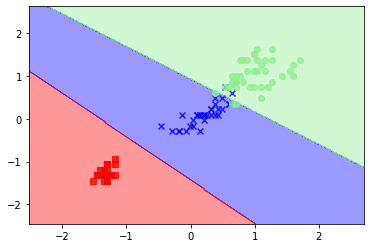

In [38]:
plot_decision_regions(x_train_std,
                      y_train, classifier=svm)

In [11]:
x_combined_std = np.vstack((x_train_std, x_test_std))
y_combined = np.hstack((y_train, y_test))

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


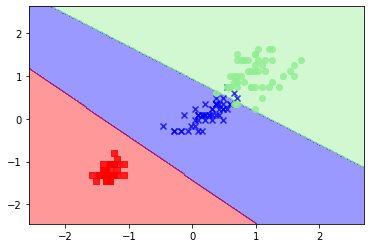

In [41]:
plot_decision_regions(x_combined_std,
                     y_combined, classifier=svm)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


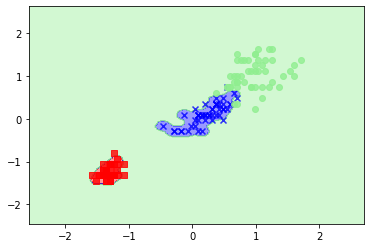

In [42]:
#support vector machine
svm = SVC(kernel='rbf', random_state=0, gamma=100.0, C=1.0)#rbf is the Gaussian Kernel
svm.fit(x_train_std, y_train)
plot_decision_regions(x_combined_std,
                     y_combined, classifier=svm)
#with bigger gamma value the formation of class 0 is much tighter
#gamma is the cut-off parameter of the Gaussian spheres

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


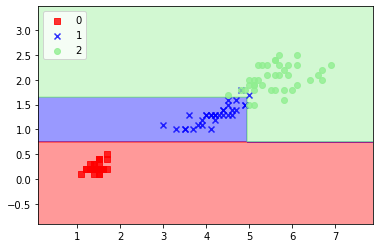

In [54]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(criterion='entropy',
                              max_depth=3, random_state=0)
tree.fit(x_train, y_train)
#X_combined = np.vstack((x_train, x_test))
#y_combined = np.vstack((y_train, y_test))

plot_decision_regions(x_train,
                      y_train,classifier=tree)
                     
plt.legend(loc='upper left')
plt.show()

In [62]:
#random forest
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(criterion='entropy',
                                n_estimators=10,
                                random_state=1,
                                n_jobs=1)
forest.fit(x_train, y_train)
#the parameter n_jobs is meant to parallelize the model training using multiple cores 
#n_estimator is the number of decsion trees used in this case
#entropy is used as the impurity measure

RandomForestClassifier(criterion='entropy', n_estimators=10, n_jobs=1,
                       random_state=1)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


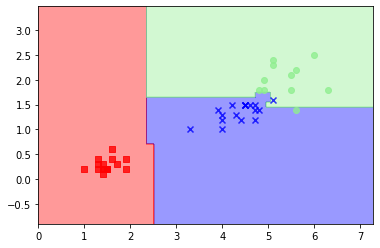

In [63]:
plot_decision_regions(x_test, 
                      y_test,classifier=forest)

In [18]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5, p=2,
                           metric='minkowski')
knn.fit(x_train_std, y_train)
plot_decision_regions(x_train_std, 
                      y_train,
                      classifier=knn)

NameError: name 'plt' is not defined

In [68]:
import pandas as pd
from io import StringIO
csv_data='''A,B,C,D
1,2,3,4
5,6,7,8
0,11,12'''
df=pd.read_csv(StringIO(csv_data))
df

,A,B,C,D
0,1,2,3,4.0
1,5,6,7,8.0
2,0,11,12,NaN


In [70]:
df.isnull().sum() #return the NAN terms' number in each column

A    0
B    0
C    0
D    1
dtype: int64

In [72]:
df.values#print out the values only

array([[ 1.,  2.,  3.,  4.],
       [ 5.,  6.,  7.,  8.],
       [ 0., 11., 12., nan]])

In [73]:
df.dropna()#get rid of the row with NAN vlaues

,A,B,C,D
0,1,2,3,4.0
1,5,6,7,8.0


In [74]:
df.dropna(axis=1)#get rid of the columns with NAN

,A,B,C
0,1,2,3
1,5,6,7
2,0,11,12


In [76]:
df.dropna(thresh=3)#get rid of the rows with more than 1 NAN

,A,B,C,D
0,1,2,3,4.0
1,5,6,7,8.0
2,0,11,12,NaN


In [81]:
#replace each NaN value with the corresponding mean
column_means=df.mean()#compute the column mean
df = df.fillna(column_means)#fill the NaN value with the mean value of the column

In [82]:
print(df)

   A   B   C    D
0  1   2   3  4.0
1  5   6   7  8.0
2  0  11  12  6.0


In [111]:
#handling categorical data
import pandas as pd
df=pd.DataFrame([
    ['green', 'M', 10.1, 'class1'],
    ['red', 'L', 13.5, 'class2'],
    ['blue', 'XL', 15.3, 'class1']])
df.columns=['colour', 'size', 'price', 'classlabel']#define the classess in a row

In [112]:
print(df)

  colour size  price classlabel
0  green    M   10.1     class1
1    red    L   13.5     class2
2   blue   XL   15.3     class1


In [93]:
#map the categorical data with a feature numerical value
size_mapping={
    'XL':3,
    "L":2,
    "M":1
}
df['size']=df['size'].map(size_mapping)
print(df)

  colour  size  price classlabel
0  green     1   10.1     class1
1    red     2   13.5     class2
2   blue     3   15.3     class1


In [121]:
#encode the classlabel
import numpy as np
class_mapping={label: idx for idx,label in 
              enumerate(np.unique(df['classlabel']))}
#the np.unqiue will only select those that only appear once not repeatedly
print(class_mapping)
type(class_mapping)

{0: 0, 1: 1}


dict

In [136]:
df['classlabel']=df['classlabel'].map(class_mapping)
print(df)

  colour size  price  classlabel
0  green    M   10.1           1
1    red    L   13.5           0
2   blue   XL   15.3           1


In [124]:
from sklearn.preprocessing import LabelEncoder
class_le = LabelEncoder()
y = class_le.fit_transform(df['classlabel'].values)
print(y)
x={k: v for v,k in enumerate(np.unique(y))}

[1 0 1]


In [125]:
df['classlabel']=df['classlabel'].map(x)
print(df)

  colour size  price  classlabel
0  green    M   10.1           1
1    red    L   13.5           0
2   blue   XL   15.3           1


In [117]:
print(df)

  colour size  price classlabel
0  green    M   10.1     class1
1    red    L   13.5     class2
2   blue   XL   15.3     class1


In [118]:
class_mapping={
    'class1':1,
    'class2':0
}
df['classlabel']=df['classlabel'].map(class_mapping)
print(df)

  colour size  price  classlabel
0  green    M   10.1           1
1    red    L   13.5           0
2   blue   XL   15.3           1


In [153]:
x=df[['colour','size','price']].values
colour_le=LabelEncoder()
size_le=LabelEncoder()
#x=colour_le.fit_transform(df['colour'].values)
x[:,0]=colour_le.fit_transform(x[:,0])
#x[:,1]=size_le.fit_transform([x:,1])
x

array([[0, 'M', 10.1],
       [1, 'L', 13.5],
       [2, 'XL', 15.3]], dtype=object)

In [158]:
#Bulk encoding
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(handle_unknown='ignore')
ohe.fit_transform(x).toarray()

array([[1., 0., 0., 0., 1., 0., 1., 0., 0.],
       [0., 1., 0., 1., 0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0., 1., 0., 0., 1.]])

In [160]:
pd.get_dummies(df[['price', 'colour', 'size']])

,price,colour,size_L,size_M,size_XL
0,10.1,NaN,0,1,0
1,13.5,NaN,1,0,0
2,15.3,NaN,0,0,1
